In [1]:
import netket as nk
import numpy as np
import json
from matplotlib import pyplot as plt

# For all sites

In [10]:
#graph
size = (5,5)
row_num,col_num = size
n_lattice = row_num * col_num
num = [ i for i in range(row_num * col_num)]

begin = [ i * col_num for i in range(row_num)]
end = [(i + 1) * col_num - 1 for i in range(row_num)]

edgesx = []
edgesy = []
edgesz = []

for i in num:
    if i in begin:
        edgesx.append([i, i + col_num - 1])
    else:
        edgesx.append([i, i - 1])

for i in num:
    if i in num [ :col_num]:
        edgesy.append([i, num[- (col_num - i)]])
    else:
        edgesy.append([i, i - col_num])

for i in num:
    if i in begin:
        edgesz.append([i, (i + 7) % n_lattice])
    else:
        edgesz.append([i, (i + 3) % n_lattice])
        
edges = edgesx + edgesz + edgesy
graph = nk.graph.Graph(edges)
hi = nk.hilbert.Spin(s = 0.5, N = graph.n_nodes)
#pauli matrix
sx = [[0, 1], [1, 0]]
sy = [[0, -1j], [1j, 0]]
sz = [[1, 0], [0, -1]]
L = graph.n_nodes

# The basic cluster contains seven sites: paper

In [1]:
from netket import legacy as nk

edges7=[]
for i in range(1,7):
    edges7.append([0,i])
for i in range(1, 6):
    edges7.append([i,i+1])
edges7.append([1,6])
graph = nk.graph.Graph(edges7)
hi = nk.hilbert.Spin(s = 0.5, N=graph.n_nodes)
L = graph.n_nodes
h = 1

exact_result = []
e_m=[]

for J in np.arange(0, 1.01, 0.1):
    ha = nk.operator.LocalOperator(hi)
    for i in edges7:
        ha += nk.operator.LocalOperator(hi, (-J*np.kron(sz,sz)).tolist(), i)
    for i in range(L):
        ha += -h*nk.operator.LocalOperator(hi, sx ,[i])
    ma=nk.machine.RbmSpin(hilbert=hi, alpha=1)
    ma.init_random_parameters(seed=123,sigma=0.01)
    sa=nk.sampler.MetropolisLocal(machine=ma)
    op=nk.optimizer.Sgd(learning_rate=0.01)
#     op=nk.optimizer.AdaGrad(learning_rate=0.1)
    gs=nk.variational.Vmc(hamiltonian=ha,sampler=sa,optimizer=op,n_samples=600
                                  ,use_iterative=True,diag_shift=1e-8,method='Sr')
############################ coherence #######################################################    
    for i in range(16):
        rhoterms_factorx = nk.operator.LocalOperator(hi,rhoterms[i*len(edgesx):(i+1)*len(edgesx)],edgesx)
        gs.add_observable(rhoterms_factorx, rhoindexx[i])
############################ Magnization ########################################## 
#     sxx = nk.operator.LocalOperator(hi, [sx] * L, [[i] for i in range(L)])
#     gs.add_observable(sxx, "MX")d
#     res = nk.exact.lanczos_ed(ha, first_n=1, compute_eigenvectors=True)
#     exact_result.append(res.eigenvalues[0])
#     e_m.append(res.mean(sxx, 0)/L)
# #     print("Mx: {0:.3f}".format((res.mean(sxx, 0)/L)))
#     print('The exact ground-state energy is E0=',res.eigenvalues[0])  
    gs.run(n_iter=300,output_prefix="<sites=7text%0.2f>"%(J))

ImportError: cannot import name 'legacy' from 'netket' (/usr/local/machine-learnig-QM/.netket_cpu/lib/python3.8/site-packages/netket/__init__.py)

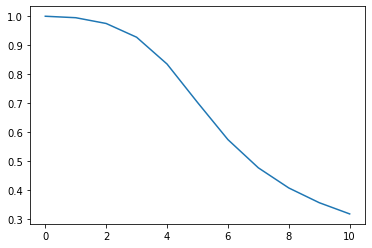

In [ ]:
plt.plot(e_m)

# Compute

In [ ]:
sx = [[0, 1], [1, 0]]
sy = [[0, -1j], [1j, 0]]
sz = [[1, 0], [0, -1]]
h = 1
#############definition of the two-partite density element##########################
ketvec = []
for i in range(4):
    kettrans = [[0],[0],[0],[0]]
    kettrans[i] = [1]
    ketvec.append(kettrans)
   
    
bravec = []
for i in range(4):
    bratrans = [0,0,0,0]
    bratrans[i] = 1
    bravec.append(bratrans)

rhoterms = []
for i in range(4):
    for j in range(4):
        for k in range(len(edgesx)):
            rhoterms.append((np.kron(ketvec[i],bravec[j])/len(edgesx)).tolist())    

rhoindexx = []
for i in range(4):
    for j in range(4):
        rhoindexx.append('rhox%d%d'%(i,j))

In [ ]:
exact_result = []
e_m=[]

for J in np.arange(0, 1.01, 0.1):
    ha = nk.operator.LocalOperator(hi)
    for i in edges:
        ha += nk.operator.LocalOperator(hi, (-J*np.kron(sz,sz)).tolist(), i)
    for i in range(L):
        ha += -h*nk.operator.LocalOperator(hi, sx ,[i])
    ma=nk.machine.RbmSpin(hilbert=hi, alpha=1)
    ma.init_random_parameters(seed=123,sigma=0.01)
    sa=nk.sampler.MetropolisLocal(machine=ma)
    op=nk.optimizer.Sgd(learning_rate=0.01)
    gs=nk.variational.Vmc(hamiltonian=ha,sampler=sa,optimizer=op,n_samples=600
                                  ,use_iterative=True,diag_shift=1e-8,method='Sr')
############################ coherence ############################################   
    for i in range(16):
        rhoterms_factorx = nk.operator.LocalOperator(hi,rhoterms[i*len(edgesx):(i+1)*len(edgesx)],edgesx)
        gs.add_observable(rhoterms_factorx, rhoindexx[i])
############################ Magnization ########################################## 
#     sxx = nk.operator.LocalOperator(hi, [sx] * L, [[i] for i in range(L)])
#     gs.add_observable(sxx, "MX")
########################### exact #################################################
#     res = nk.exact.lanczos_ed(ha, first_n=1, compute_eigenvectors=True)
#     exact_result.append(res.eigenvalues[0])#exact energy
#     e_m.append(res.mean(sxx, 0)/L)#exact magnization
# #     print("Mx: {0:.3f}".format((res.mean(sxx, 0)/L)))
#     print('The exact ground-state energy is E0=',res.eigenvalues[0])  
    gs.run(n_iter=100,output_prefix="<5text%0.2f>"%(J))

/home/lcx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Call to deprecated function 'add_observable'
100%|██████████| 100/100 [01:34<00:00,  1.05it/s, Energy=(-77.1133 + 0.0004i) ± 0.0045 [var=0.0108, R=1.00191]]


# add spin-structure factor:


$$
S^{xx}(\vec{k})=\frac{1}{N(N-1)}\sum_{l\neq j}e^{-i\vec{k}.(\vec{r_l}-\vec{r_j})}\langle\sigma_l^x\sigma_j^x\rangle,
$$
where $\vec{k}=(2\pi/3,0)$

In [ ]:
####### ################ Structure FactorX ###########################################
msxsx = (np.kron(sx, sx)) 
sfx = []
sitesfx = []
for i in range(0, L):
    for k in range(0, L):
        if i==k:
            pass
        else:
            sfx.append((cmath.exp(-complex(0,2*(k-i)*3.14/3))*msxsx).tolist())
            sitesfx.append([i,k])
structure_factorx = netket.operator.LocalOperator(hi, sfx, sitesfx)
gs.add_observable(structure_factorx, "Structure FactorX")

# Plot

J=0.00 is loadded
J=0.10 is loadded
J=0.20 is loadded
J=0.30 is loadded
J=0.40 is loadded
J=0.50 is loadded
J=0.60 is loadded
J=0.70 is loadded
J=0.80 is loadded
J=0.90 is loadded
J=1.00 is loadded


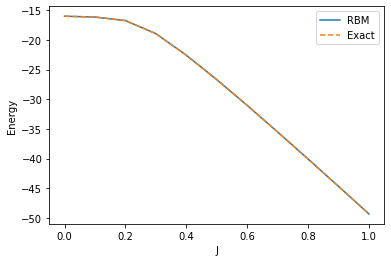

In [ ]:
Energy = []
Energy_std = []#errorbar
MX_RBM=[]
for J in np.arange(0, 1.01, 0.1):
    data = json.load(open("<text%0.2f>.log"%(J)))
    iters = []
    energy = []
    ma = []
    print("J=%0.2f is loadded"%(J))
    for iteration in data["Output"]:
        iters.append(iteration["Iteration"])
        energy.append(iteration["Energy"]["Mean"])
        ma.append(iteration["MX"]["Mean"]/L)
    Energy.append(np.mean(energy[-20:]))
    Energy_std = np.std(energy[-20:])
    MX_RBM.append(np.mean(ma[-20:]))
    
x=np.arange(0, 1.01, 0.1)
fig, ax = plt.subplots()
ax.plot(x, Energy, label='RBM')
ax.plot(x, exact_result, linestyle='--', label='Exact')
ax.legend()
ax.set_xlabel('J')
ax.set_ylabel("Energy")
plt.show()

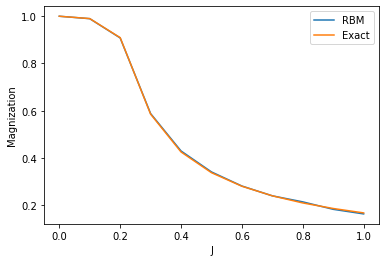

In [ ]:
x=np.arange(0, 1.01, 0.1)
fig, ax = plt.subplots()
ax.plot(x, MX_RBM, label='RBM')
ax.plot(x, e_m, label='Exact')
ax.legend()
ax.set_xlabel('J')
ax.set_ylabel("Magnization")
plt.show()

$l_1$-norm coherence:  $$C_{l_1}=\sum_{i\neq j}|\rho_{ij}|$$

J=0.00 is loadded
J=0.10 is loadded
J=0.20 is loadded
J=0.30 is loadded
J=0.40 is loadded
J=0.50 is loadded
J=0.60 is loadded
J=0.70 is loadded
J=0.80 is loadded
J=0.90 is loadded
J=1.00 is loadded


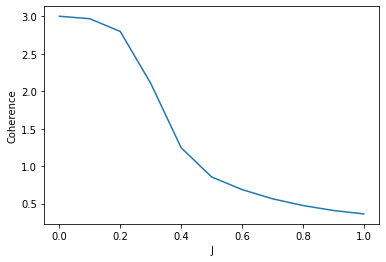

In [ ]:
cox = []
for J in np.arange(0, 1.01, 0.1):
    data = json.load(open("<text%0.2f>.log"%(J)))
    iters = []
    energy = []
    rho00x=[]
    rho11x=[]
    rho22x=[]
    rho33x=[]
    rho01x = []
    rho02x = []
    rho03x = []
    rho10x = []
    rho12x = []
    rho13x = []
    rho20x = []
    rho21x = []
    rho23x = []
    rho30x = []
    rho31x = []
    rho32x = []
    print("J=%0.2f is loadded"%(J))
    for iteration in data["Output"]:
        iters.append(iteration["Iteration"])
        energy.append(iteration["Energy"]["Mean"])
        rho00x.append(iteration["rhox00"]["Mean"])
        rho11x.append(iteration["rhox11"]["Mean"])
        rho22x.append(iteration["rhox22"]["Mean"])
        rho33x.append(iteration["rhox33"]["Mean"])        
        rho01x.append(iteration["rhox01"]["Mean"])
        rho02x.append(iteration["rhox02"]["Mean"])
        rho03x.append(iteration["rhox03"]["Mean"])
        rho10x.append(iteration["rhox10"]["Mean"])
        rho12x.append(iteration["rhox12"]["Mean"])
        rho13x.append(iteration["rhox13"]["Mean"])
        rho20x.append(iteration["rhox20"]["Mean"])
        rho21x.append(iteration["rhox21"]["Mean"])
        rho23x.append(iteration["rhox23"]["Mean"])
        rho30x.append(iteration["rhox30"]["Mean"])
        rho31x.append(iteration["rhox31"]["Mean"])
        rho32x.append(iteration["rhox32"]["Mean"])
    ax=np.abs(np.mean(rho01x[-20:]))+np.abs(np.mean(rho02x[-20:]))+np.abs(np.mean(rho03x[-20:]))+np.abs(np.mean(rho10x[-20:]))+np.abs(np.mean(rho12x[-20:]))+np.abs(np.mean(rho13x[-20:]))+np.abs(np.mean(rho20x[-20:]))+np.abs(np.mean(rho21x[-20:]))+np.abs(np.mean(rho23x[-20:]))+np.abs(np.mean(rho30x[-20:]))+np.abs(np.mean(rho31x[-20:]))+np.abs(np.mean(rho32x[-20:]))
    cox.append(ax)

x=np.arange(0, 1.01, 0.1)
fig, ax = plt.subplots()
ax.plot(x, cox)
ax.set_xlabel('J')
ax.set_ylabel("Coherence")
plt.show()

J=0.00 is loadded
J=0.10 is loadded
J=0.20 is loadded
J=0.30 is loadded
J=0.40 is loadded
J=0.50 is loadded
J=0.60 is loadded
J=0.70 is loadded
J=0.80 is loadded
J=0.90 is loadded
J=1.00 is loadded


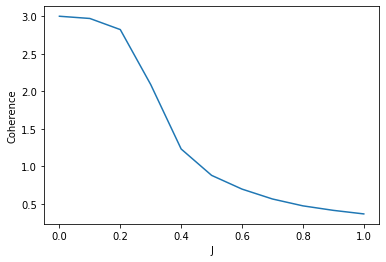

In [ ]:
cox5 = []
for J in np.arange(0, 1.01, 0.1):
    data = json.load(open("<5text%0.2f>.log"%(J)))
    iters = []
    energy = []
    rho00x=[]
    rho11x=[]
    rho22x=[]
    rho33x=[]
    rho01x = []
    rho02x = []
    rho03x = []
    rho10x = []
    rho12x = []
    rho13x = []
    rho20x = []
    rho21x = []
    rho23x = []
    rho30x = []
    rho31x = []
    rho32x = []
    print("J=%0.2f is loadded"%(J))
    for iteration in data["Output"]:
        iters.append(iteration["Iteration"])
        energy.append(iteration["Energy"]["Mean"])
        rho00x.append(iteration["rhox00"]["Mean"])
        rho11x.append(iteration["rhox11"]["Mean"])
        rho22x.append(iteration["rhox22"]["Mean"])
        rho33x.append(iteration["rhox33"]["Mean"])        
        rho01x.append(iteration["rhox01"]["Mean"])
        rho02x.append(iteration["rhox02"]["Mean"])
        rho03x.append(iteration["rhox03"]["Mean"])
        rho10x.append(iteration["rhox10"]["Mean"])
        rho12x.append(iteration["rhox12"]["Mean"])
        rho13x.append(iteration["rhox13"]["Mean"])
        rho20x.append(iteration["rhox20"]["Mean"])
        rho21x.append(iteration["rhox21"]["Mean"])
        rho23x.append(iteration["rhox23"]["Mean"])
        rho30x.append(iteration["rhox30"]["Mean"])
        rho31x.append(iteration["rhox31"]["Mean"])
        rho32x.append(iteration["rhox32"]["Mean"])
    ax=np.abs(np.mean(rho01x[-20:]))+np.abs(np.mean(rho02x[-20:]))+np.abs(np.mean(rho03x[-20:]))+np.abs(np.mean(rho10x[-20:]))+np.abs(np.mean(rho12x[-20:]))+np.abs(np.mean(rho13x[-20:]))+np.abs(np.mean(rho20x[-20:]))+np.abs(np.mean(rho21x[-20:]))+np.abs(np.mean(rho23x[-20:]))+np.abs(np.mean(rho30x[-20:]))+np.abs(np.mean(rho31x[-20:]))+np.abs(np.mean(rho32x[-20:]))
    cox5.append(ax)

x=np.arange(0, 1.01, 0.1)
fig, ax = plt.subplots()
ax.plot(x, cox5)
ax.set_xlabel('J')
ax.set_ylabel("Coherence")
plt.show()

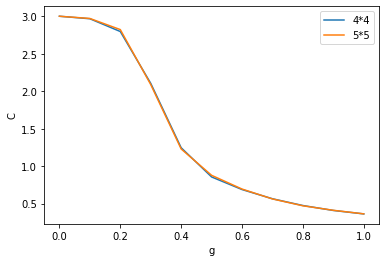

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, cox, label='4*4')
ax.plot(x, cox5, label='5*5')
ax.legend()
ax.set_xlabel('g')
ax.set_ylabel("C")
plt.show()
plt.savefig("co.pdf")

# Plot coherence\energy\magnization\structure factorx for different size in one plot: